In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv(r"C:\Users\Ameen\Desktop\MyProjects-P\Customer Churn project\archive\Telco_customer_churn.csv")
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


EDA :

In [26]:
df.info()

print("-"*70)

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [27]:
df["Churn Reason"].value_counts()

#check the distribution of churn reasons to identify common patterns
#and understand the main factors behind customer churn

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

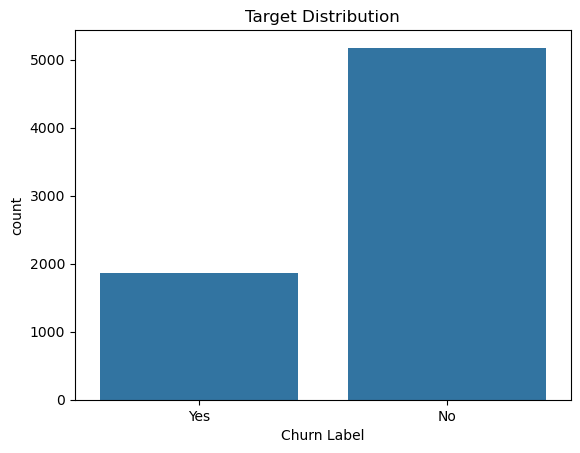

Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [28]:
sns.countplot(x = "Churn Label" ,  data = df)
plt.title("Target Distribution")
plt.show()

df["Churn Label"].value_counts(normalize=True)

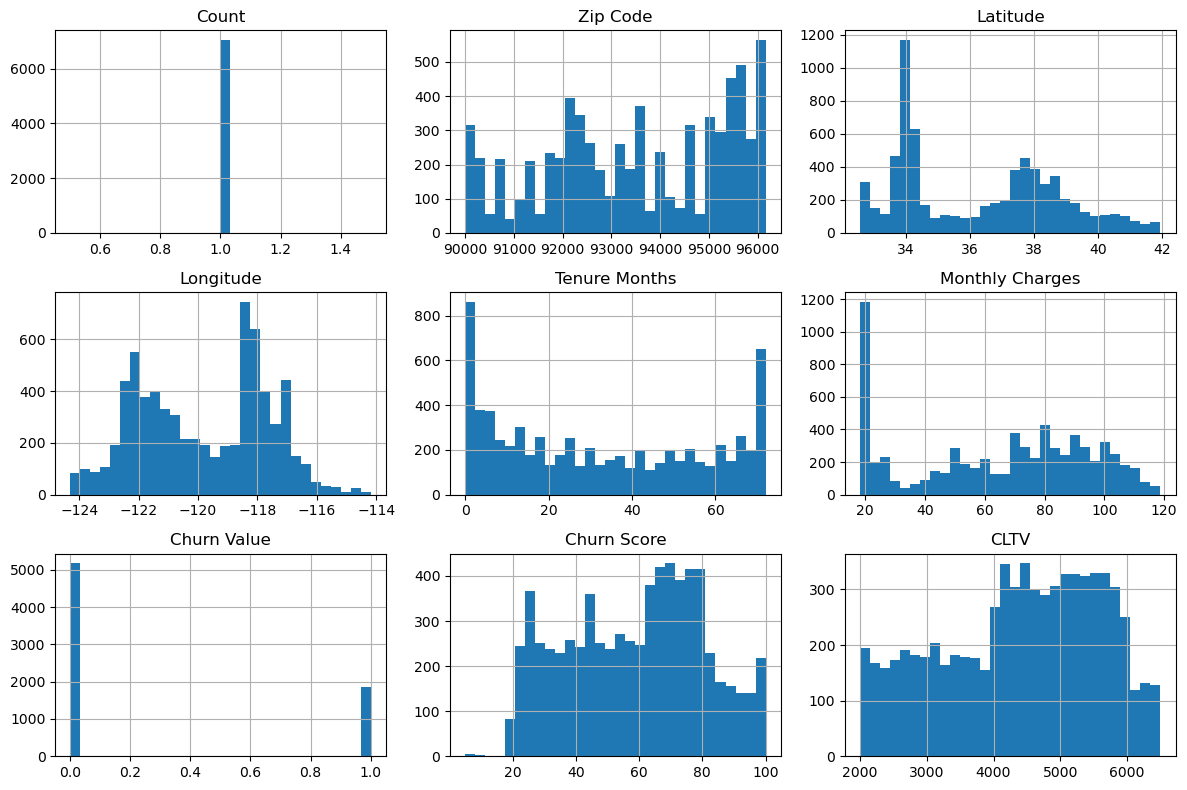

In [29]:
num_cols = df.select_dtypes(include=["int64" , "float64"]).columns

df[num_cols].hist(bins = 30 , figsize = (12 , 8))
plt.tight_layout()
plt.show()

#histograms show that most numerical features are skewed 
#contain outliers, and have different scales 
#which suggests the need for scaling and careful feature handling


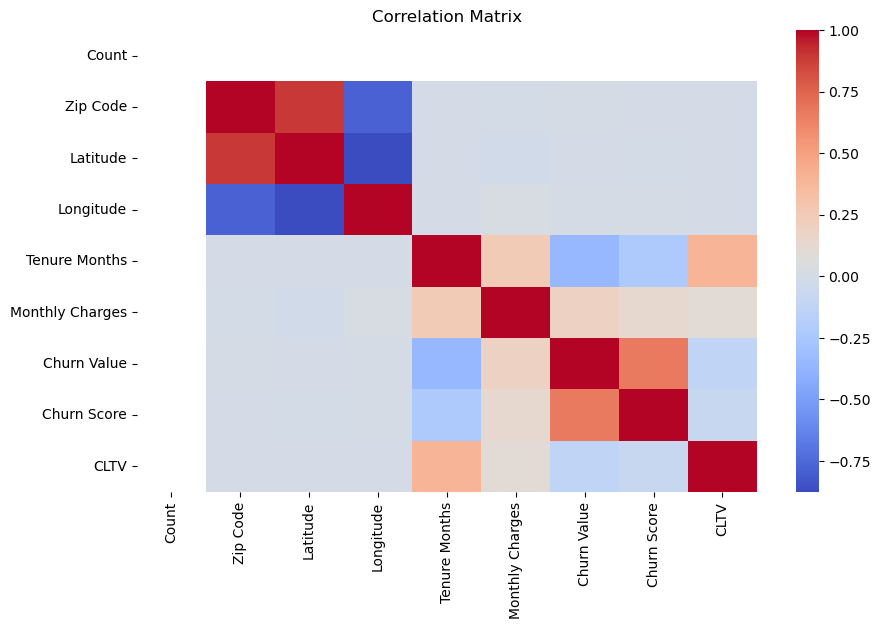

In [30]:
plt.figure(figsize = (10 , 6))
sns.heatmap(df[num_cols].corr(), cmap = "coolwarm" , annot = False)
plt.title("Correlation Matrix")
plt.show()


#the correlation heatmap shows mostly weak to moderate relationships
#between numerical features , indicating low multicollinearity


In [31]:
cat_cols = df.select_dtypes(include=["object" , "category"]).columns
target_col = "Churn Label" 

In [32]:
def check_outliers(df):
    
    ignore_cols = [
        "order_id" , "product_id" , "user_id" ,
        "aisle_id" , "department_id" , "eval_set"
    ]

    numeric_cols = df.select_dtypes(include=[np.number]).columns

    outlier_cols = [col for col in numeric_cols if col not in ignore_cols]

    n_cols = 3
    n_rows = (len(outlier_cols) // n_cols) + 1
    plt.figure(figsize=(20 , 5 * n_rows))

    for i, col in enumerate(outlier_cols):
        plt.subplot(n_rows , n_cols , i + 1)

        plot_data = (
            df[col]
            .dropna()
            .sample(n=min(100_000 , len(df)) , random_state = 42)
        )

        sns.boxplot(x = plot_data , color = "lightblue")
        plt.title(col , fontsize = 12)
        plt.xlabel("")

    plt.tight_layout()
    plt.show()


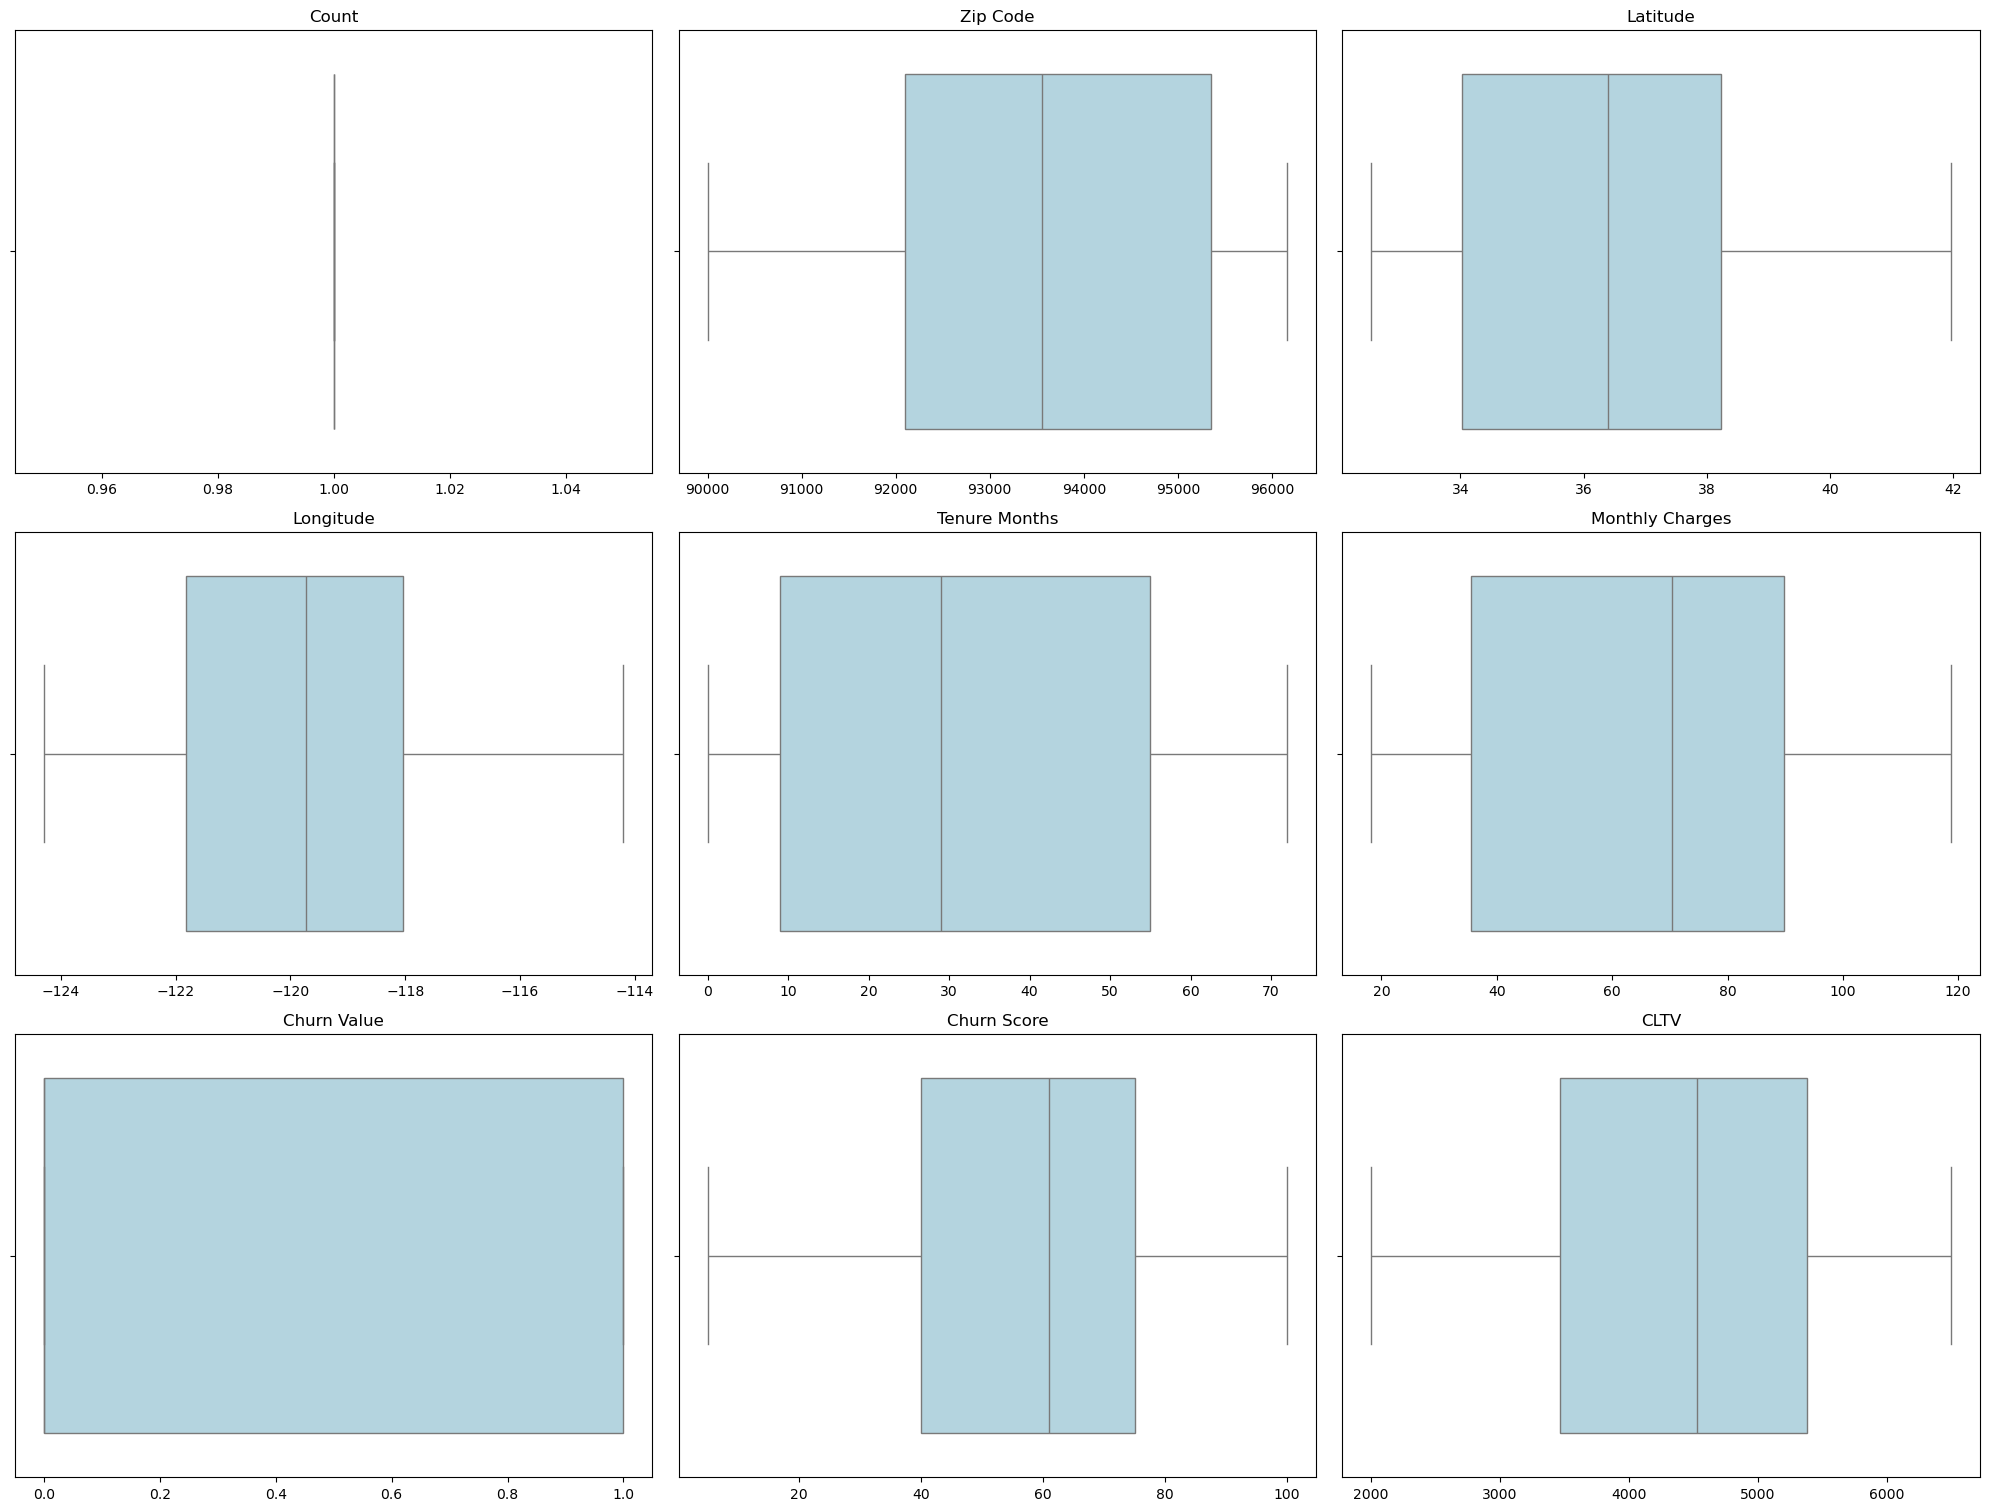

In [33]:
check_outliers(df)

In [34]:
#IMPORTANT:
#churn Value is the target (label)
#churn Score is a precomputed metric derived from churn-related information
#using Churn Score together with Churn Value would cause data leakage
#so Churn Score must be excluded from the feature set


#churn Score is NOT the target
#it is a precomputed score based on churn-related information
#using Churn Score together with Churn Value will introduce data leakage
#therefore Churn Score must be dropped before training the model